In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
import io
from sklearn.model_selection import train_test_split, validation_curve, learning_curve, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import log_loss, auc, roc_auc_score, roc_curve, average_precision_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import mean_squared_error

import missingno
import sklearn

import xgboost as xgb
from xgboost import plot_tree

import scikitplot as skplt

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# File located in google drive
url = "https://drive.google.com/uc?export=download&id=1p5qOHBkiRing9gEd341mz9LVvEGtlbpL"

file = requests.get(url).content
df = pd.read_csv(io.StringIO(file.decode('utf-8')))

X = df.drop(['enrollee_id','target'], axis = 1)
Y = df['target']


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


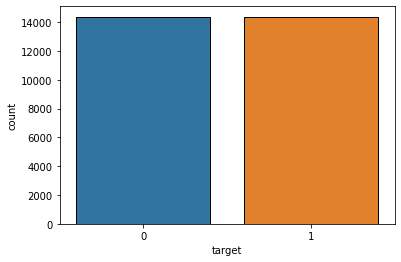

In [2]:
smote = SMOTE(random_state = 42)
X, Y = smote.fit_resample(X,Y)

sns.countplot(Y, edgecolor = 'black')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# End of Data PreProcessing

In [4]:
# Separate the data in Train & Test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42, test_size = 0.2)
X_train.head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,relevent_experience,training_hours
3274,1,0,3,0,8,4,4,1,64,0.624,1,5
6325,1,0,2,0,16,5,0,1,6,0.924,1,133
2425,2,1,3,0,11,3,1,5,95,0.855,0,78
15404,1,0,2,0,10,3,0,4,83,0.762,1,83
26265,1,0,2,0,9,3,0,2,5,0.920,0,90


In [5]:
columns = X.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = columns)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = columns)
X_test.head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,relevent_experience,training_hours
0,-0.169639,1.326784,-0.101984,-0.310699,-0.645860,1.112375,2.896987,-0.500517,-1.177134,0.878873,-1.295013,0.856360
1,-0.169639,-0.532653,-0.101984,-0.310699,0.538547,0.494365,-0.522807,1.979117,0.100037,0.878873,-1.295013,-0.572465
2,-0.169639,-0.532653,1.466767,-0.310699,1.722955,0.494365,-0.522807,1.979117,-0.451469,0.705178,0.772193,-0.711862
3,-0.169639,-0.532653,-0.101984,1.909736,0.982700,-0.123645,-0.522807,1.979117,-1.177134,0.878873,-1.295013,0.263921
4,-0.169639,-0.532653,-0.101984,-0.310699,0.982700,-0.123645,-0.522807,1.979117,-1.177134,0.878873,-1.295013,2.354883


In [6]:
Y_train.value_counts(normalize=True)

1    0.500022
0    0.499978
Name: target, dtype: float64

In [7]:
Y_test.value_counts(normalize=True)

0    0.500087
1    0.499913
Name: target, dtype: float64

In [8]:
%%time
clf = xgb.XGBClassifier()

clf.fit(X_train, Y_train)

CPU times: user 1.14 s, sys: 0 ns, total: 1.14 s
Wall time: 1.14 s


XGBClassifier()

In [9]:
scores = cross_val_score(clf, X_train, Y_train, cv = 5, scoring = 'roc_auc')
scores

array([0.83782413, 0.83038949, 0.83099661, 0.83234034, 0.82681688])

In [10]:
scores.mean()

0.8316734917570624

In [11]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 37.4 ms, sys: 78 µs, total: 37.4 ms
Wall time: 36.9 ms


In [12]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8386164115620045
Test AUC Score 0.8342337772647002
 
Acuracy  0.7616895532765514
ROC_AUC  0.8342337772647002
PR  0.8248038352988313
 
[[2178  699]
 [ 672 2204]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2877
           1       0.76      0.77      0.76      2876

    accuracy                           0.76      5753
   macro avg       0.76      0.76      0.76      5753
weighted avg       0.76      0.76      0.76      5753



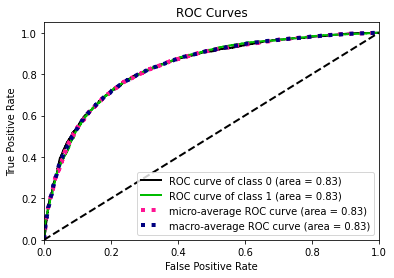

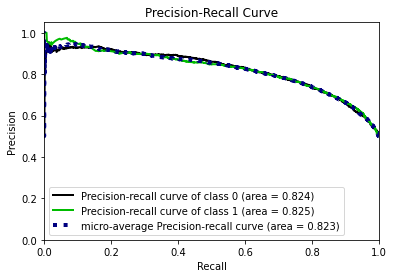

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

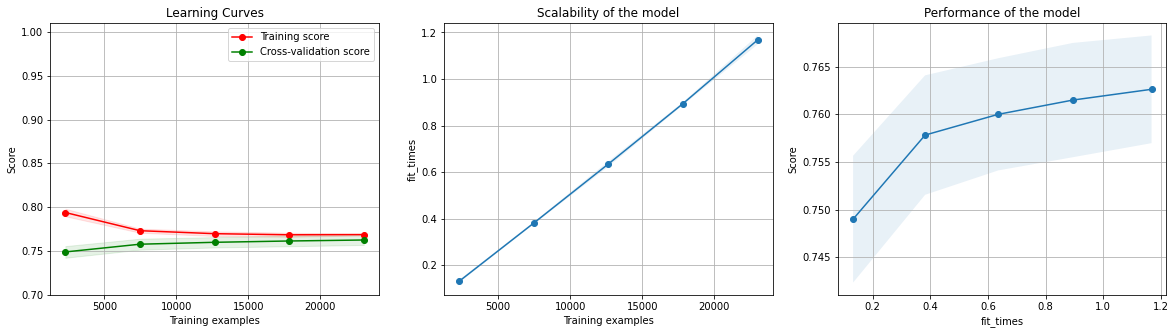

In [13]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

In [14]:
clf.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

Understanding Bias & Variance: https://www.coursera.org/lecture/machine-learning/learning-curves-Kont7
https://elitedatascience.com/bias-variance-tradeoff

In [15]:
%%time
clf = xgb.XGBClassifier(
   # colsample_bytree = 0.6,
    max_depth = 5
   # gamma = 0.1,
   # min_child_weight = 4 ,
)

eval_set = [(X_test, Y_test)]
clf.fit(X_train, Y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set)
#clf.fit(X_train, Y_train, early_stopping_rounds=10)

[0]	validation_0-logloss:0.666452
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.644934
[2]	validation_0-logloss:0.627194
[3]	validation_0-logloss:0.61217
[4]	validation_0-logloss:0.599401
[5]	validation_0-logloss:0.588595
[6]	validation_0-logloss:0.578733
[7]	validation_0-logloss:0.570167
[8]	validation_0-logloss:0.563535
[9]	validation_0-logloss:0.559198
[10]	validation_0-logloss:0.553716
[11]	validation_0-logloss:0.548996
[12]	validation_0-logloss:0.545696
[13]	validation_0-logloss:0.541658
[14]	validation_0-logloss:0.54003
[15]	validation_0-logloss:0.536652
[16]	validation_0-logloss:0.535028
[17]	validation_0-logloss:0.534293
[18]	validation_0-logloss:0.531515
[19]	validation_0-logloss:0.531926
[20]	validation_0-logloss:0.532635
[21]	validation_0-logloss:0.531018
[22]	validation_0-logloss:0.528831
[23]	validation_0-logloss:0.527066
[24]	validation_0-logloss:0.527681
[25]	validation_0-logloss:0.52652
[26]	validation_0-logloss:0.524148


XGBClassifier(max_depth=5)

In [16]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 38.9 ms


In [17]:
clf.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [18]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8663085840104594
Test AUC Score 0.8444643697097937
 
Acuracy  0.7656874674083087
ROC_AUC  0.8444643697097937
PR  0.8374169938543493
 
[[2052  825]
 [ 523 2353]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      2877
           1       0.74      0.82      0.78      2876

    accuracy                           0.77      5753
   macro avg       0.77      0.77      0.77      5753
weighted avg       0.77      0.77      0.77      5753



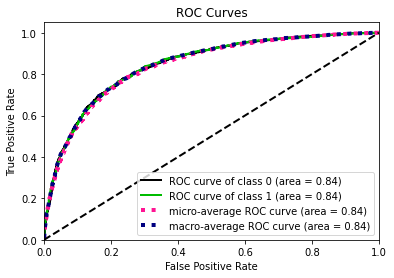

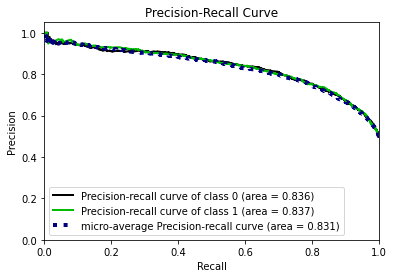

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

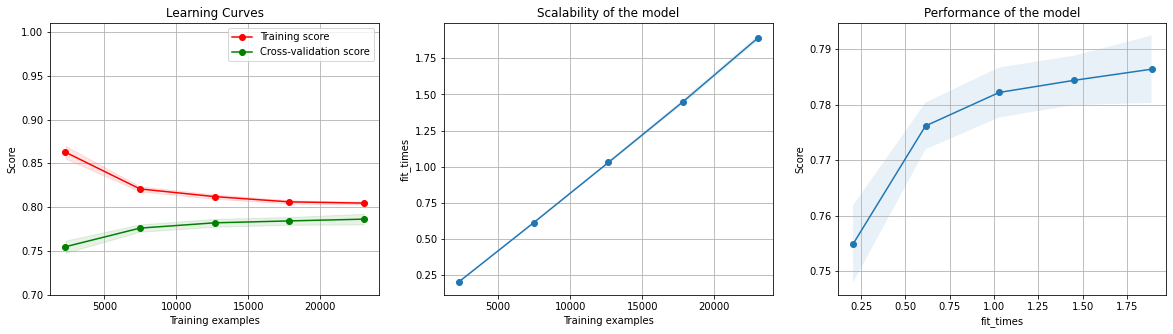

In [19]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

In [20]:
%%time
parameters = [{    
    'min_child_weight' : [2,3, 4, 5, 7,8,9,10 ]
    ,'max_depth' : [5]
    # 'gamma'            : [ 0.1, 0.05, 1],
    # 'colsample_bytree' : [ 0.4, 0.6, 1 ],
}]

eval_set = [(X_test, Y_test)]

GridSearch = GridSearchCV(clf, param_grid = parameters, n_jobs=-1, cv=4, scoring = 'roc_auc')
GridSearch.fit(X_train, Y_train,eval_metric="logloss", eval_set=eval_set, verbose=True)


[0]	validation_0-logloss:0.666411
[1]	validation_0-logloss:0.644853
[2]	validation_0-logloss:0.627105
[3]	validation_0-logloss:0.612141
[4]	validation_0-logloss:0.599361
[5]	validation_0-logloss:0.588556
[6]	validation_0-logloss:0.579524
[7]	validation_0-logloss:0.570751
[8]	validation_0-logloss:0.563667
[9]	validation_0-logloss:0.557599
[10]	validation_0-logloss:0.552606
[11]	validation_0-logloss:0.547799
[12]	validation_0-logloss:0.544351
[13]	validation_0-logloss:0.540493
[14]	validation_0-logloss:0.538116
[15]	validation_0-logloss:0.535529
[16]	validation_0-logloss:0.532635
[17]	validation_0-logloss:0.531878
[18]	validation_0-logloss:0.529027
[19]	validation_0-logloss:0.528548
[20]	validation_0-logloss:0.52915
[21]	validation_0-logloss:0.526944
[22]	validation_0-logloss:0.525665
[23]	validation_0-logloss:0.523455
[24]	validation_0-logloss:0.522049
[25]	validation_0-logloss:0.519979
[26]	validation_0-logloss:0.51866
[27]	validation_0-logloss:0.51793
[28]	validation_0-logloss:0.51741

GridSearchCV(cv=4, estimator=XGBClassifier(max_depth=5), n_jobs=-1,
             param_grid=[{'max_depth': [5],
                          'min_child_weight': [2, 3, 4, 5, 7, 8, 9, 10]}],
             scoring='roc_auc')

In [21]:
GridSearch.best_params_

{'max_depth': 5, 'min_child_weight': 5}

In [22]:
%%time
clf = xgb.XGBClassifier(
   # colsample_bytree = 0.6,
   # gamma = 0.1,
    max_depth = 5
    ,min_child_weight = 5
)

eval_set = [(X_test, Y_test)]
clf.fit(X_train, Y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set)
#clf.fit(X_train, Y_train, early_stopping_rounds=10)

[0]	validation_0-logloss:0.666411
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.644853
[2]	validation_0-logloss:0.627105
[3]	validation_0-logloss:0.612141
[4]	validation_0-logloss:0.599361
[5]	validation_0-logloss:0.588556
[6]	validation_0-logloss:0.579524
[7]	validation_0-logloss:0.570751
[8]	validation_0-logloss:0.563667
[9]	validation_0-logloss:0.557599
[10]	validation_0-logloss:0.552606
[11]	validation_0-logloss:0.547799
[12]	validation_0-logloss:0.544351
[13]	validation_0-logloss:0.540493
[14]	validation_0-logloss:0.538116
[15]	validation_0-logloss:0.535529
[16]	validation_0-logloss:0.532635
[17]	validation_0-logloss:0.531878
[18]	validation_0-logloss:0.529027
[19]	validation_0-logloss:0.528548
[20]	validation_0-logloss:0.52915
[21]	validation_0-logloss:0.526944
[22]	validation_0-logloss:0.525665
[23]	validation_0-logloss:0.523455
[24]	validation_0-logloss:0.522049
[25]	validation_0-logloss:0.519979
[26]	validation_0-logloss:0.51866

XGBClassifier(max_depth=5, min_child_weight=5)

In [23]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8607836535061554
Test AUC Score 0.8430972370674715
 
Acuracy  0.7625586650443247
ROC_AUC  0.8430972370674715
PR  0.836565982949576
 
[[2044  833]
 [ 533 2343]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      2877
           1       0.74      0.81      0.77      2876

    accuracy                           0.76      5753
   macro avg       0.77      0.76      0.76      5753
weighted avg       0.77      0.76      0.76      5753



In [24]:
clf.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 5,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

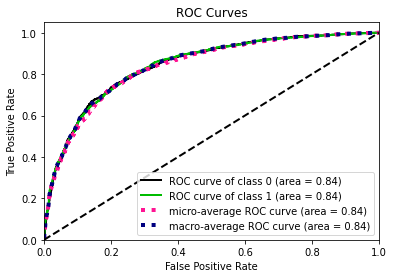

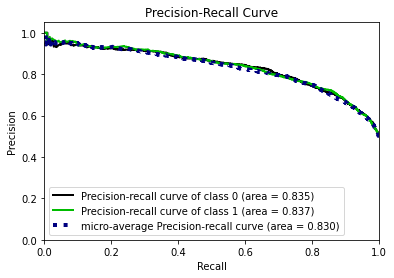

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

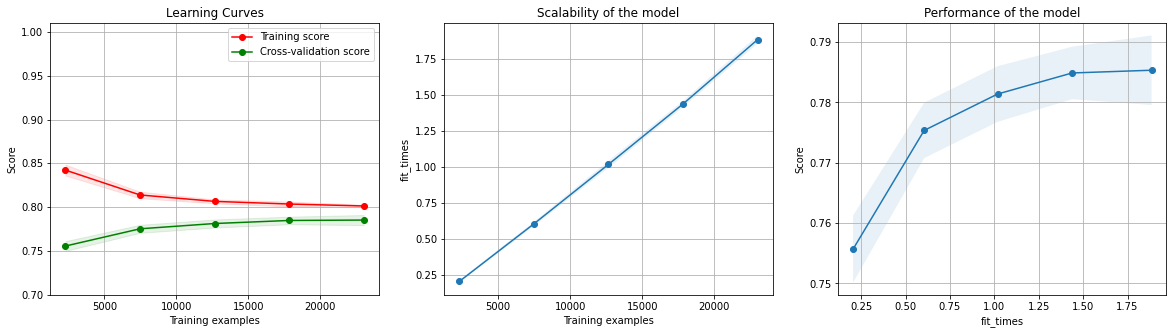

In [25]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

In [26]:
%%time
parameters = [{        
    'gamma'            : [0.01, 0.001, 0.1, 0.05, 1]
    ,'min_child_weight' : [5]
    ,'max_depth' : [5]
    # 'colsample_bytree' : [ 0.4, 0.6, 1 ],
}]

eval_set = [(X_test, Y_test)]

GridSearch = GridSearchCV(clf, param_grid = parameters, n_jobs=-1, cv=4, scoring = 'roc_auc')
GridSearch.fit(X_train, Y_train, eval_metric="logloss", eval_set=eval_set, verbose=True)


[0]	validation_0-logloss:0.666411
[1]	validation_0-logloss:0.644853
[2]	validation_0-logloss:0.627105
[3]	validation_0-logloss:0.612141
[4]	validation_0-logloss:0.599361
[5]	validation_0-logloss:0.588556
[6]	validation_0-logloss:0.579524
[7]	validation_0-logloss:0.570747
[8]	validation_0-logloss:0.563631
[9]	validation_0-logloss:0.557565
[10]	validation_0-logloss:0.552577
[11]	validation_0-logloss:0.547771
[12]	validation_0-logloss:0.544321
[13]	validation_0-logloss:0.540474
[14]	validation_0-logloss:0.538094
[15]	validation_0-logloss:0.535558
[16]	validation_0-logloss:0.534128
[17]	validation_0-logloss:0.531337
[18]	validation_0-logloss:0.531337
[19]	validation_0-logloss:0.528442
[20]	validation_0-logloss:0.528792
[21]	validation_0-logloss:0.527347
[22]	validation_0-logloss:0.528344
[23]	validation_0-logloss:0.526149
[24]	validation_0-logloss:0.524602
[25]	validation_0-logloss:0.523604
[26]	validation_0-logloss:0.522097
[27]	validation_0-logloss:0.520298
[28]	validation_0-logloss:0.51

GridSearchCV(cv=4, estimator=XGBClassifier(max_depth=5, min_child_weight=5),
             n_jobs=-1,
             param_grid=[{'gamma': [0.01, 0.001, 0.1, 0.05, 1],
                          'max_depth': [5], 'min_child_weight': [5]}],
             scoring='roc_auc')

In [27]:
GridSearch.best_params_

{'gamma': 0.1, 'max_depth': 5, 'min_child_weight': 5}

In [28]:
%%time
clf = xgb.XGBClassifier(
   # colsample_bytree = 0.6,
    #max_depth = 15
    max_depth = 5 
    ,min_child_weight = 5
    ,gamma = 0.1
)

eval_set = [(X_test, Y_test)]
clf.fit(X_train, Y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set)
#clf.fit(X_train, Y_train, early_stopping_rounds=10)

[0]	validation_0-logloss:0.666411
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.644853
[2]	validation_0-logloss:0.627105
[3]	validation_0-logloss:0.612141
[4]	validation_0-logloss:0.599361
[5]	validation_0-logloss:0.588556
[6]	validation_0-logloss:0.579524
[7]	validation_0-logloss:0.570747
[8]	validation_0-logloss:0.563631
[9]	validation_0-logloss:0.557565
[10]	validation_0-logloss:0.552577
[11]	validation_0-logloss:0.547771
[12]	validation_0-logloss:0.544321
[13]	validation_0-logloss:0.540474
[14]	validation_0-logloss:0.538094
[15]	validation_0-logloss:0.535558
[16]	validation_0-logloss:0.534128
[17]	validation_0-logloss:0.531337
[18]	validation_0-logloss:0.531337
[19]	validation_0-logloss:0.528442
[20]	validation_0-logloss:0.528792
[21]	validation_0-logloss:0.527347
[22]	validation_0-logloss:0.528344
[23]	validation_0-logloss:0.526149
[24]	validation_0-logloss:0.524602
[25]	validation_0-logloss:0.523604
[26]	validation_0-logloss:0.5220

XGBClassifier(gamma=0.1, max_depth=5, min_child_weight=5)

In [29]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8600055857977936
Test AUC Score 0.8422445315902876
 
Acuracy  0.7679471580045194
ROC_AUC  0.8422445315902876
PR  0.8358878833613183
 
[[2100  777]
 [ 558 2318]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      2877
           1       0.75      0.81      0.78      2876

    accuracy                           0.77      5753
   macro avg       0.77      0.77      0.77      5753
weighted avg       0.77      0.77      0.77      5753



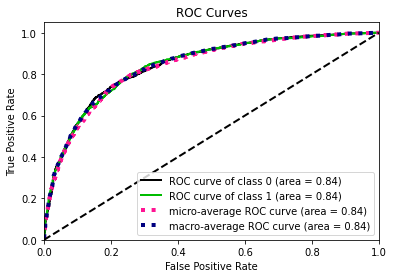

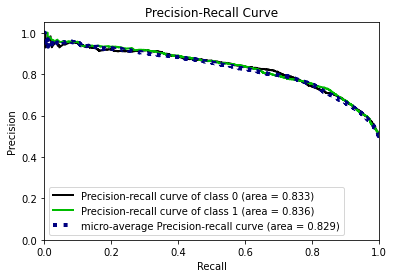

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

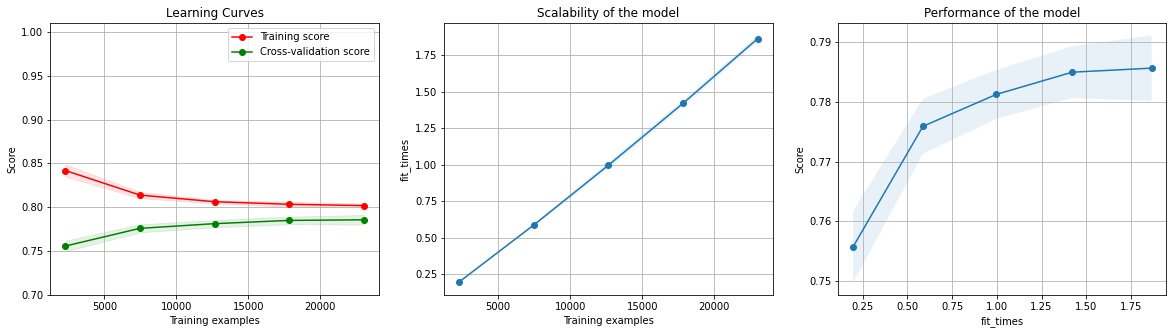

In [30]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

In [31]:
%%time
parameters = [{        
    'colsample_bytree' : [ 0.2, 0.4, 0.6, 1, 1.2]
    ,'max_depth' : [5]
    ,'min_child_weight' : [5]
    ,'gamma' : [0.1]
}]

eval_set = [(X_test, Y_test)]

GridSearch = GridSearchCV(clf, param_grid = parameters, n_jobs=-1, cv=4, scoring = 'roc_auc')
GridSearch.fit(X_train, Y_train, eval_metric="logloss", eval_set=eval_set, verbose=True)


[0]	validation_0-logloss:0.677518
[1]	validation_0-logloss:0.655102
[2]	validation_0-logloss:0.639282
[3]	validation_0-logloss:0.624121
[4]	validation_0-logloss:0.61199
[5]	validation_0-logloss:0.601873
[6]	validation_0-logloss:0.590545
[7]	validation_0-logloss:0.584689
[8]	validation_0-logloss:0.576065
[9]	validation_0-logloss:0.56984


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.83915646 0.85246481 0.85458357 0.85435493        nan]
  category=UserWarning


[10]	validation_0-logloss:0.563294
[11]	validation_0-logloss:0.557907
[12]	validation_0-logloss:0.551931
[13]	validation_0-logloss:0.549323
[14]	validation_0-logloss:0.545784
[15]	validation_0-logloss:0.541723
[16]	validation_0-logloss:0.538347
[17]	validation_0-logloss:0.535971
[18]	validation_0-logloss:0.534027
[19]	validation_0-logloss:0.531074
[20]	validation_0-logloss:0.529395
[21]	validation_0-logloss:0.527187
[22]	validation_0-logloss:0.525567
[23]	validation_0-logloss:0.524258
[24]	validation_0-logloss:0.524606
[25]	validation_0-logloss:0.523015
[26]	validation_0-logloss:0.521024
[27]	validation_0-logloss:0.521295
[28]	validation_0-logloss:0.519208
[29]	validation_0-logloss:0.518007
[30]	validation_0-logloss:0.519564
[31]	validation_0-logloss:0.518377
[32]	validation_0-logloss:0.517535
[33]	validation_0-logloss:0.517382
[34]	validation_0-logloss:0.518808
[35]	validation_0-logloss:0.518287
[36]	validation_0-logloss:0.516961
[37]	validation_0-logloss:0.516624
[38]	validation_0-lo

GridSearchCV(cv=4,
             estimator=XGBClassifier(gamma=0.1, max_depth=5,
                                     min_child_weight=5),
             n_jobs=-1,
             param_grid=[{'colsample_bytree': [0.2, 0.4, 0.6, 1, 1.2],
                          'gamma': [0.1], 'max_depth': [5],
                          'min_child_weight': [5]}],
             scoring='roc_auc')

In [32]:
GridSearch.best_params_

{'colsample_bytree': 0.6, 'gamma': 0.1, 'max_depth': 5, 'min_child_weight': 5}

In [33]:
%%time
clf = xgb.XGBClassifier(
     colsample_bytree = 0.6,
     gamma = 0.1,
     max_depth = 5,
     min_child_weight = 5
)

eval_set = [(X_test, Y_test)]
clf.fit(X_train, Y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set)
#clf.fit(X_train, Y_train, early_stopping_rounds=10)

[0]	validation_0-logloss:0.677518
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.655102
[2]	validation_0-logloss:0.639282
[3]	validation_0-logloss:0.624121
[4]	validation_0-logloss:0.61199
[5]	validation_0-logloss:0.601873
[6]	validation_0-logloss:0.590545
[7]	validation_0-logloss:0.584689
[8]	validation_0-logloss:0.576065
[9]	validation_0-logloss:0.56984
[10]	validation_0-logloss:0.563294
[11]	validation_0-logloss:0.557907
[12]	validation_0-logloss:0.551931
[13]	validation_0-logloss:0.549323
[14]	validation_0-logloss:0.545784
[15]	validation_0-logloss:0.541723
[16]	validation_0-logloss:0.538347
[17]	validation_0-logloss:0.535971
[18]	validation_0-logloss:0.534027
[19]	validation_0-logloss:0.531074
[20]	validation_0-logloss:0.529395
[21]	validation_0-logloss:0.527187
[22]	validation_0-logloss:0.525567
[23]	validation_0-logloss:0.524258
[24]	validation_0-logloss:0.524606
[25]	validation_0-logloss:0.523015
[26]	validation_0-logloss:0.521024

XGBClassifier(colsample_bytree=0.6, gamma=0.1, max_depth=5, min_child_weight=5)

In [34]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8611704395923886
Test AUC Score 0.8379690393766108
 
Acuracy  0.76238484269077
ROC_AUC  0.8379690393766108
PR  0.8325081976656461
 
[[2114  763]
 [ 604 2272]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.76      2877
           1       0.75      0.79      0.77      2876

    accuracy                           0.76      5753
   macro avg       0.76      0.76      0.76      5753
weighted avg       0.76      0.76      0.76      5753



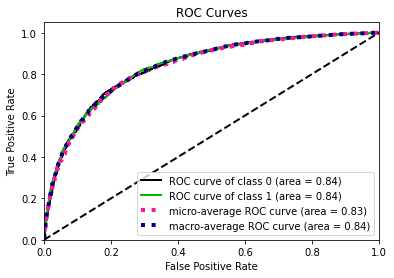

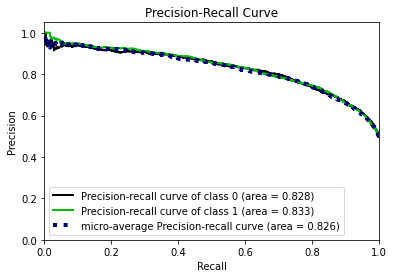

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

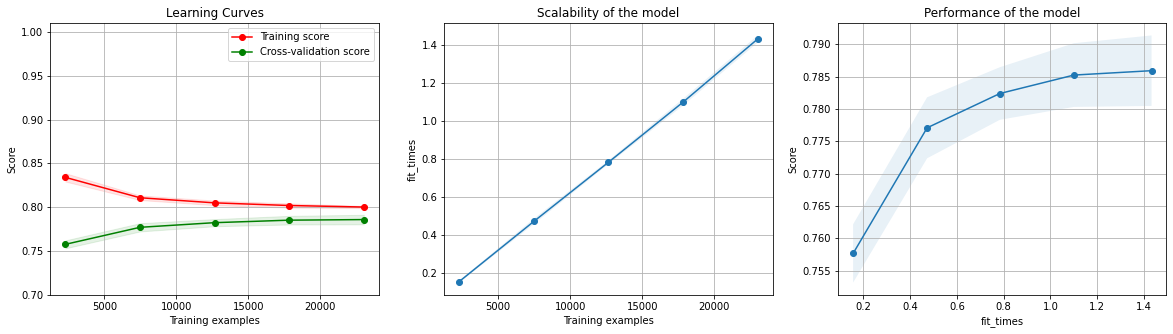

In [35]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

In [36]:
%%time
parameters = [{    
     'colsample_bytree' : [0.6],
     'gamma' : [0.1],
     'max_depth' : [5],
     'min_child_weight' : [5],
     'min_samples_split' : [5,7,10]
    ,'min_samples_leaf' : [2,5,7]
}]

eval_set = [(X_test, Y_test)]

GridSearch = GridSearchCV(clf, param_grid = parameters, n_jobs=-1, cv=4, scoring = 'roc_auc')
GridSearch.fit(X_train, Y_train,eval_metric="logloss", eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.677518
[1]	validation_0-logloss:0.655102
[2]	validation_0-logloss:0.639282
[3]	validation_0-logloss:0.624121
[4]	validation_0-logloss:0.61199
[5]	validation_0-logloss:0.601873
[6]	validation_0-logloss:0.590545
[7]	validation_0-logloss:0.584689
[8]	validation_0-logloss:0.576065
[9]	validation_0-logloss:0.56984
[10]	validation_0-logloss:0.563294
[11]	validation_0-logloss:0.557907
[12]	validation_0-logloss:0.551931
[13]	validation_0-logloss:0.549323
[14]	validation_0-logloss:0.545784
[15]	validation_0-logloss:0.541723
[16]	validation_0-logloss:0.538347
[17]	validation_0-logloss:0.535971
[18]	validation_0-logloss:0.534027
[19]	validation_0-logloss:0.531074
[20]	validation_0-logloss:0.529395
[21]	validation_0-logloss:0.527187
[22]	validation_0-logloss:0.525567
[23]	validation_0-logloss:0.524258
[24]	validation_0-logloss:0.524606
[25]	validation_0-logloss:0.523015
[26]	validation_0-logloss:0.521024
[27]	validation_0-logloss:0.521295
[28]	validation_0-logloss:0.5192

GridSearchCV(cv=4,
             estimator=XGBClassifier(colsample_bytree=0.6, gamma=0.1,
                                     max_depth=5, min_child_weight=5),
             n_jobs=-1,
             param_grid=[{'colsample_bytree': [0.6], 'gamma': [0.1],
                          'max_depth': [5], 'min_child_weight': [5],
                          'min_samples_leaf': [2, 5, 7],
                          'min_samples_split': [5, 7, 10]}],
             scoring='roc_auc')

In [37]:
GridSearch.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.1,
 'max_depth': 5,
 'min_child_weight': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [38]:
%%time
clf = xgb.XGBClassifier(
    colsample_bytree = 0.6,
    gamma = 0.1,
    max_depth = 5,
    min_child_weight = 5,
    min_samples_leaf = 2,
    min_samples_split = 5
)

eval_set = [(X_test, Y_test)]
clf.fit(X_train, Y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
#clf.fit(X_train, Y_train, early_stopping_rounds=10)

[0]	validation_0-logloss:0.677518
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.655102
[2]	validation_0-logloss:0.639282
[3]	validation_0-logloss:0.624121
[4]	validation_0-logloss:0.61199
[5]	validation_0-logloss:0.601873
[6]	validation_0-logloss:0.590545
[7]	validation_0-logloss:0.584689
[8]	validation_0-logloss:0.576065
[9]	validation_0-logloss:0.56984
[10]	validation_0-logloss:0.563294
[11]	validation_0-logloss:0.557907
[12]	validation_0-logloss:0.551931
[13]	validation_0-logloss:0.549323
[14]	validation_0-logloss:0.545784
[15]	validation_0-logloss:0.541723
[16]	validation_0-logloss:0.538347
[17]	validation_0-logloss:0.535971
[18]	validation_0-logloss:0.534027
[19]	validation_0-logloss:0.531074
[20]	validation_0-logloss:0.529395
[21]	validation_0-logloss:0.527187
[22]	validation_0-logloss:0.525567
[23]	validation_0-logloss:0.524258
[24]	validation_0-logloss:0.524606
[25]	validation_0-logloss:0.523015
[26]	validation_0-logloss:0.521024

XGBClassifier(colsample_bytree=0.6, gamma=0.1, max_depth=5, min_child_weight=5,
              min_samples_leaf=2, min_samples_split=5)

In [39]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 41.4 ms, sys: 36 µs, total: 41.4 ms
Wall time: 39.8 ms


In [40]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8611704395923886
Test AUC Score 0.8379690393766108
 
Acuracy  0.76238484269077
ROC_AUC  0.8379690393766108
PR  0.8325081976656461
 
[[2114  763]
 [ 604 2272]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.76      2877
           1       0.75      0.79      0.77      2876

    accuracy                           0.76      5753
   macro avg       0.76      0.76      0.76      5753
weighted avg       0.76      0.76      0.76      5753



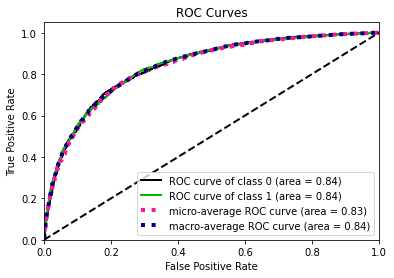

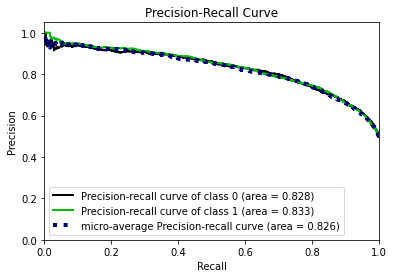

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

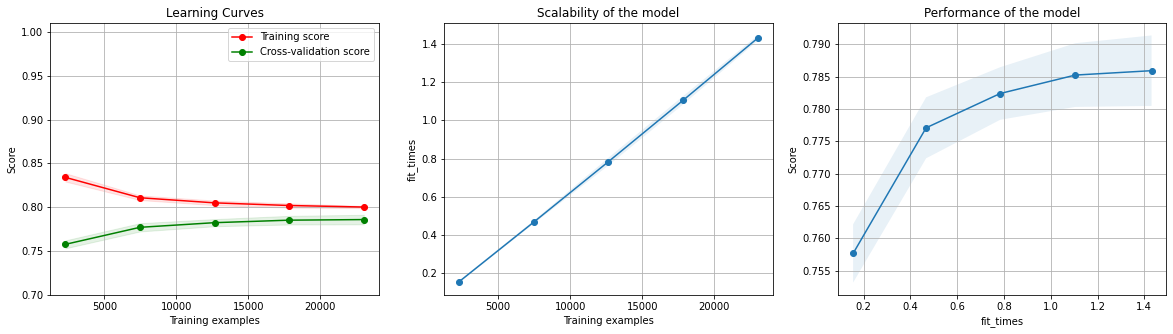

In [41]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

ERROR! Session/line number was not unique in database. History logging moved to new session 112


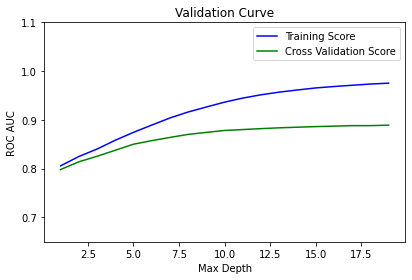

In [42]:
parameter_range = np.arange(1, 20, 1) 
  
# Calculate accuracy on training and test set using the  
# gamma parameter with 5-fold cross validation 
train_score, test_score = validation_curve(clf, X, Y, 
                                       param_name = "max_depth", 
                                       param_range = parameter_range, 
                                        cv = 5, scoring = "roc_auc") 
  
# Calculating mean and standard deviation of training score 
mean_train_score = np.mean(train_score, axis = 1) 
std_train_score = np.std(train_score, axis = 1) 
  
# Calculating mean and standard deviation of testing score 
mean_test_score = np.mean(test_score, axis = 1) 
std_test_score = np.std(test_score, axis = 1) 
  
# Plot mean accuracy scores for training and testing scores 
plt.plot(parameter_range, mean_train_score,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_score, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve") 
plt.xlabel("Max Depth") 
plt.ylabel("ROC AUC") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.ylim((0.65,1.1))   # set the ylim to bottom, top
plt.show()

In [43]:
clf.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 5,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 5}